In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

%matplotlib inline

# 1. Single variable

## Data

Text(0, 0.5, 'y')

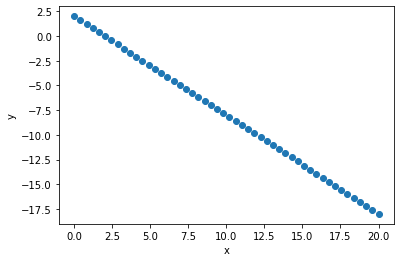

In [12]:
X=np.linspace(0,20)
Y=-X+2
#plot
plt.plot(X,Y,"o")
plt.xlabel("x")
plt.ylabel("y")

## Batch

In [30]:
def Adagrad_Batch_GD(x,y,alpha=0.001,epsilon=0.001, iterations_no=100):
    losses=[]
    ths_0=[]
    ths_1=[]
    Y_predict_list=[]
   
    #1. intialize parameters
    theta_0=0
    theta_1=0
    v_0=0
    v_1=0
    
    for e in range(iterations_no):
        print('======================================================================')
        print('epoch ', e)
        
        ths_0.append(theta_0)
        ths_1.append(theta_1)
        #2. get predicted output

        y_hat=theta_0+theta_1*x
        Y_predict_list.append(y_hat)

        #3. cost function
        error=(y_hat-y)
        
        J=(np.dot(error,error))/(2*len(x))
        
        losses.append(J)  
        print('cost= ', J)
        #4. gradient

        th0_gd =((y_hat - y).sum())/(len(x))
        th1_gd = (np.dot((y_hat - y),x))/(len(x))

        #5. Update the parameters (simultaneously).
        
        v_0 =  v_0 + ((th0_gd)**2)
        v_1 =  v_1 + (( th1_gd)**2)
        
        theta_0 = theta_0 - ((alpha)/(np.sqrt(v_0) +epsilon )) * th0_gd
        theta_1 = theta_1 - ((alpha)/(np.sqrt(v_1) +epsilon )) * th1_gd
        
        print('theta 0 = ', theta_0)
        print('theta 1 = ' , theta_1)
        
        # stop condition
        if (e !=0):
            if (abs(losses[e-1] - losses[e])<0.001):
                break
            
    
    
    return y_hat,theta_0 , theta_1, ths_0, ths_1, losses, Y_predict_list

In [31]:
y_hat,theta_0 , theta_1, ths_0, ths_1, losses, Y_predict_list=Adagrad_Batch_GD(X,Y,alpha=0.9,epsilon=0.0001,iterations_no=1000)

epoch  0
cost=  49.34693877551021
theta 0 =  -0.8999887501406233
theta 1 =  -0.8999992153031753
epoch  1
cost=  1.9784358263931978
theta 0 =  -0.6920280702264827
theta 1 =  -0.7792347934780458
epoch  2
cost=  0.9627526070944444
theta 0 =  -0.6391028854987123
theta 1 =  -0.8011212022867574
epoch  3
cost=  0.8975743268153
theta 0 =  -0.5682668738560588
theta 1 =  -0.8042052274409216
epoch  4
cost=  0.8512499153949734
theta 0 =  -0.5019680544142988
theta 1 =  -0.8095665351223306
epoch  5
cost=  0.807667922614294
theta 0 =  -0.437215532267951
theta 1 =  -0.8144679886407198
epoch  6
cost=  0.7664196728756668
theta 0 =  -0.37432232616306316
theta 1 =  -0.819270880364707
epoch  7
cost=  0.7273654670363848
theta 0 =  -0.313177307675811
theta 1 =  -0.823933883076338
epoch  8
cost=  0.6903796109911454
theta 0 =  -0.2537276189122582
theta 1 =  -0.8284675777232833
epoch  9
cost=  0.6553445392719204
theta 0 =  -0.19591607555778195
theta 1 =  -0.8328755750393443
epoch  10
cost=  0.6221502095278912
t

cost=  0.060045562432808175
theta 0 =  1.3347162513090556
theta 1 =  -0.9494069083870373
epoch  57
cost=  0.05709894386988194
theta 0 =  1.3512425714778866
theta 1 =  -0.9506638774346305
epoch  58
cost=  0.05429735812311209
theta 0 =  1.3673559704187317
theta 1 =  -0.9518894267284151
epoch  59
cost=  0.05163362508481265
theta 0 =  1.383066939575002
theta 1 =  -0.953084355564658
epoch  60
cost=  0.0491009241056388
theta 0 =  1.398385691114401
theta 1 =  -0.9542494418912904
epoch  61
cost=  0.04669277561527298
theta 0 =  1.413322166283016
theta 1 =  -0.9553854429515424
epoch  62
cost=  0.04440302371962299
theta 0 =  1.42788604344494
theta 1 =  -0.9564930959030248
epoch  63
cost=  0.042225819719155074
theta 0 =  1.4420867458234161
theta 1 =  -0.9575731184135234
epoch  64
cost=  0.040155606496452334
theta 0 =  1.4559334489584534
theta 1 =  -0.9586262092346921
epoch  65
cost=  0.03818710372430565
theta 0 =  1.4694350878949074
theta 1 =  -0.9596530487547459
epoch  66
cost=  0.036315293848642

In [32]:
r2_score(Y,y_hat)

0.9989103700426131

Text(0, 0.5, 'loss')

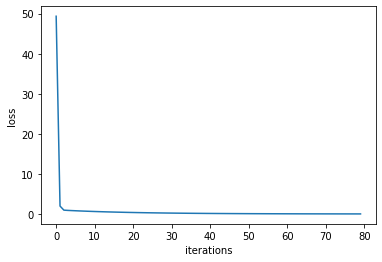

In [33]:
plt.plot(losses)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

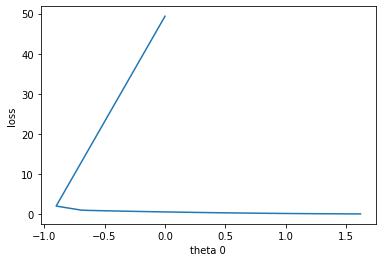

In [34]:
plt.plot(ths_0,losses)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

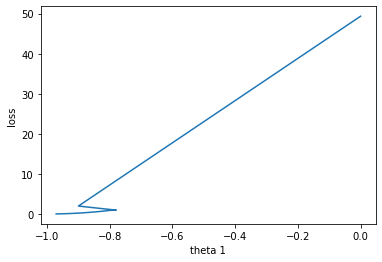

In [35]:
plt.plot(ths_1,losses)
plt.xlabel("theta 1")
plt.ylabel("loss")

Text(0, 0.5, 'y')

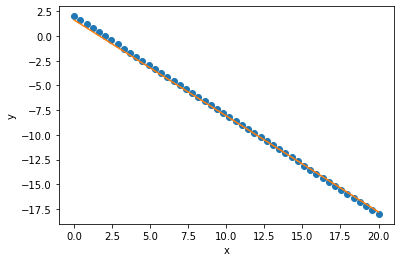

In [36]:
plt.plot(X,Y,"o")
plt.plot(X,y_hat)
plt.xlabel("x")
plt.ylabel("y")

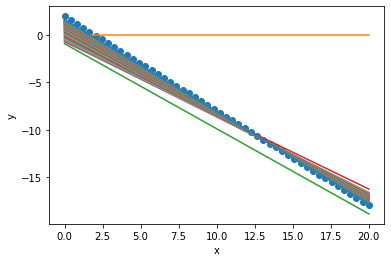

In [37]:
#all fitted lines
plt.plot(X,Y,'o')
plt.ylabel("y")
plt.xlabel("x")

for i in range(len(ths_0)):
    plt.plot(X,Y_predict_list[i])
    
    
plt.show()

## Mini Batch

In [38]:
def mini_batches(x,y,batch_size):
    x_batches=[]
    y_batches=[]
    number_of_batches=len(x)//batch_size
    
    for i in range(number_of_batches):
        x_batches.append(x[i*batch_size: (i+1)*batch_size])
        y_batches.append(y[i*batch_size : (i+1)*batch_size])
    return x_batches, y_batches
        
    

In [40]:
def Adagrad_MiniBatch_GD(x,y, batch_size=1,alpha=0.001,epsilon=0.001, Epochs_no=100):
    loss=[]
    th0_list=[]
    th1_list=[]
    Y_predict_list=[]
    
    x_batchs=[]
    y_batchs=[]
    
    #get the batches 
    x_batchs,y_batchs=mini_batches(x,y,batch_size)
    
    #1. assume intial values for parameters 
    theta_0=0
    theta_1=0
    v_0=0
    v_1=0
    
    for e in range(Epochs_no): #epochs loop
        print('==============================================')
        print('epoch ',e)
        
        Y_pred_per_epoch=[]
        for i in range(len(x_batchs)):#loop through all batches
            #2.predict 
            y_predicted= theta_0 + theta_1 * x_batchs[i]
            Y_pred_per_epoch.extend(y_predicted)
            #3.cost 
            error= y_predicted - y_batchs[i]
            J= (np.dot(error, error))/(2*batch_size)
            loss.append(J)
            
            #4.gradient
            grad_th0=( y_predicted - y_batchs[i]).sum()/(batch_size)
            grad_th1= (np.dot((y_predicted - y_batchs[i]), x_batchs[i]))/(batch_size)
            
            #update
            v_0 =  v_0 + ((grad_th0)**2)
            v_1 = v_1 + (( grad_th1)**2)
            
            theta_0 = theta_0 - ((alpha)/(np.sqrt(v_0) +epsilon )) * grad_th0
            theta_1 = theta_1 - ((alpha)/(np.sqrt(v_1) +epsilon )) * grad_th1
            
            th0_list.append(theta_0)
            th1_list.append(theta_1)
            
        print('cost= ', J)
        Y_predict_list.append(Y_pred_per_epoch)
        
        #stop condition
        
        if(e!=0):
            if abs(prev_cost - J)<0.0001:
                break
        prev_cost=J
        
    return Y_pred_per_epoch,Y_predict_list ,theta_0 ,theta_1 , loss, th0_list, th1_list
        
#try batch size=5    

In [44]:

Y_hat_mini,Y_predict_list_mini ,theta_0_mini ,theta_1_mini , loss_mini, th0_list_mini, th1_list_mini =Adagrad_MiniBatch_GD(X, Y,5,alpha=0.9,epsilon=0.0001,Epochs_no=1000)
#get small iterations for the same parameters

epoch  0
cost=  8.566614743435078
epoch  1
cost=  0.014507004539609764
epoch  2
cost=  0.010872629991059384
epoch  3
cost=  0.008219845301927523
epoch  4
cost=  0.006241156975661721
epoch  5
cost=  0.0047535724135524425
epoch  6
cost=  0.003628844732076042
epoch  7
cost=  0.002774941385690703
epoch  8
cost=  0.0021246674938290105
epoch  9
cost=  0.001628334867218234
epoch  10
cost=  0.0012488521485657488
epoch  11
cost=  0.0009583348529920314
epoch  12
cost=  0.0007357081585195221
epoch  13
cost=  0.0005649796755694313
epoch  14
cost=  0.00043397662278660406
epoch  15
cost=  0.00033341197781840625
epoch  16
cost=  0.00025618777478686027


In [45]:
r2_score(Y, Y_hat_mini) #reached the optimum parameters with small iterations

0.9991132981172687

Text(0, 0.5, 'loss')

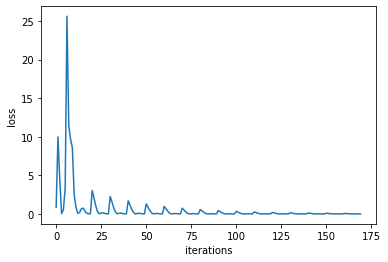

In [46]:
plt.plot(loss_mini)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

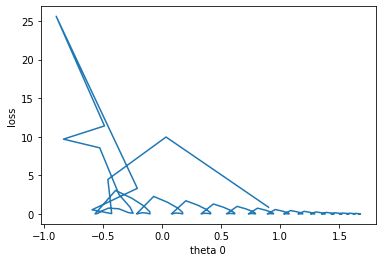

In [47]:
plt.plot(th0_list_mini,loss_mini)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

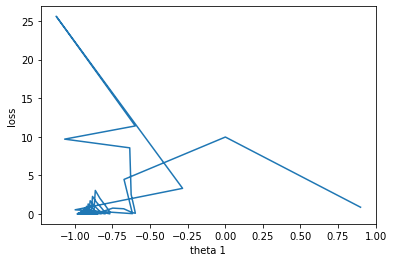

In [48]:
plt.plot(th1_list_mini,loss_mini)
plt.xlabel("theta 1")
plt.ylabel("loss")

Text(0, 0.5, 'y')

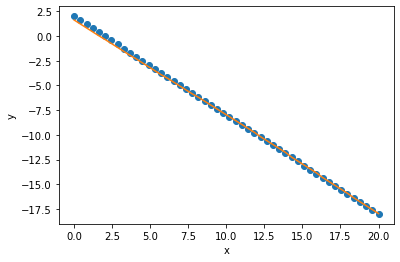

In [49]:
plt.plot(X,Y,"o")
plt.plot(X,Y_hat_mini)
plt.xlabel("x")
plt.ylabel("y")

# 2.Multi variable

In [50]:
f=open("data/MultipleLR.csv")
multi_data=np.loadtxt(f,delimiter=",")
x_0=np.ones((len(multi_data[:,0]) , 1))
multi_X=np.concatenate((x_0, multi_data[:,:3].reshape(len(multi_data[:,0]) , 3)),axis=1)
multi_X.shape

(25, 4)

In [51]:
multi_Y=multi_data[:,3]
multi_Y=multi_Y.reshape((multi_Y.shape[0],1))
multi_Y.shape

(25, 1)

In [53]:
def Adagrad_MiniBatch_GD_Multi(x,y, batch_size=1,alpha=0.0001,epsilon=0.001, Epochs_no=100):
    loss=[]
    Y_predict_list=[]
    
    x_batchs=[]
    y_batchs=[]
    
    #get the batches 
    x_batchs,y_batchs=mini_batches(x,y,batch_size)
    
    #1. assume intial values for parameters 
    theta_vector=np.zeros(x.shape[1]).reshape(x.shape[1],1)
    v_vector=np.zeros(x.shape[1]).reshape(x.shape[1],1)
    thetas=theta_vector.T
    
    for e in range(Epochs_no): #epochs loop
        print('==============================================')
        print('epoch ',e)
        
        Y_pred_per_epoch=[]
        for i in range(len(x_batchs)):#loop through all batches
            #2.predict 
            y_predicted=np.dot(x_batchs[i],theta_vector)
            Y_pred_per_epoch.extend(y_predicted)
            #3.cost 
            error= y_predicted - y_batchs[i]
            J= (np.dot(error.T, error))/(2*batch_size)
            loss.append(J[0][0])
            
    
            #4. gradient vector
            gradient_vector=np.zeros(x_batchs[i].shape[1])
            gradient_vector=(np.dot(x_batchs[i].T,(y_predicted - y_batchs[i]) ))/(batch_size)

            #5. update parameters
           
            v_vector =  v_vector +  np.square(gradient_vector)
            
            theta_vector = theta_vector - ((alpha)/(np.sqrt(v_vector) +epsilon )) * gradient_vector
        
            thetas=np.vstack([thetas, theta_vector.T])
        
             
            
        print('cost= ', J[0][0])
        Y_predict_list.append(Y_pred_per_epoch)
        #stop condition
        
        if(e!=0):
            if abs(prev_cost - J)<0.001:
                break
        prev_cost=J
        
        
    return Y_pred_per_epoch, theta_vector, thetas,loss
            
#batch size = 5    
    

In [59]:
Y_pred_multi, theta_vector_multi, thetas_multi,loss_multi=Adagrad_MiniBatch_GD_Multi(multi_X, multi_Y,5,alpha=0.9,epsilon=0.0001,Epochs_no=1000)

epoch  0
cost=  12.164795549329698
epoch  1
cost=  12.048646558947777
epoch  2
cost=  11.987243389101533
epoch  3
cost=  11.92653576329207
epoch  4
cost=  11.866504331709699
epoch  5
cost=  11.807139946710347
epoch  6
cost=  11.74843360723673
epoch  7
cost=  11.690376453791107
epoch  8
cost=  11.63295976578931
epoch  9
cost=  11.57617495897901
epoch  10
cost=  11.520013582917851
epoch  11
cost=  11.464467318510659
epoch  12
cost=  11.40952797560339
epoch  13
cost=  11.355187490632067
epoch  14
cost=  11.301437924325565
epoch  15
cost=  11.248271459459676
epoch  16
cost=  11.195680398661537
epoch  17
cost=  11.143657162263196
epoch  18
cost=  11.092194286201906
epoch  19
cost=  11.041284419966825
epoch  20
cost=  10.990920324590402
epoch  21
cost=  10.941094870682361
epoch  22
cost=  10.891801036507202
epoch  23
cost=  10.843031906101151
epoch  24
cost=  10.794780667430208
epoch  25
cost=  10.7470406105861
epoch  26
cost=  10.699805126020646
epoch  27
cost=  10.653067702816283
epoch  28

cost=  7.5556205728953545
epoch  136
cost=  7.538717880102707
epoch  137
cost=  7.521952713617305
epoch  138
cost=  7.505323636855946
epoch  139
cost=  7.488829231038842
epoch  140
cost=  7.472468094943269
epoch  141
cost=  7.456238844661624
epoch  142
cost=  7.440140113362172
epoch  143
cost=  7.424170551054514
epoch  144
cost=  7.4083288243574685
epoch  145
cost=  7.392613616271335
epoch  146
cost=  7.37702362595285
epoch  147
cost=  7.361557568493903
epoch  148
cost=  7.346214174703855
epoch  149
cost=  7.330992190894141
epoch  150
cost=  7.315890378666967
epoch  151
cost=  7.300907514706931
epoch  152
cost=  7.286042390575356
epoch  153
cost=  7.271293812508172
epoch  154
cost=  7.256660601216403
epoch  155
cost=  7.242141591690026
epoch  156
cost=  7.227735633004126
epoch  157
cost=  7.2134415881285125
epoch  158
cost=  7.199258333739752
epoch  159
cost=  7.185184760036192
epoch  160
cost=  7.1712197705553375
epoch  161
cost=  7.1573622819944775
epoch  162
cost=  7.143611224033425

cost=  6.244822291568751
epoch  252
cost=  6.2374951582550535
epoch  253
cost=  6.230214535430372
epoch  254
cost=  6.222980042001824
epoch  255
cost=  6.215791300814469
epoch  256
cost=  6.20864793860338
epoch  257
cost=  6.201549585947374
epoch  258
cost=  6.194495877222584
epoch  259
cost=  6.18748645055663
epoch  260
cost=  6.180520947783821
epoch  261
cost=  6.1735990144010175
epoch  262
cost=  6.166720299523244
epoch  263
cost=  6.1598844558409205
epoch  264
cost=  6.153091139576928
epoch  265
cost=  6.146340010444662
epoch  266
cost=  6.139630731606421
epoch  267
cost=  6.1329629696322145
epoch  268
cost=  6.126336394459813
epoch  269
cost=  6.119750679354135
epoch  270
cost=  6.113205500868368
epoch  271
cost=  6.10670053880482
epoch  272
cost=  6.100235476176611
epoch  273
cost=  6.093809999169595
epoch  274
cost=  6.087423797105364
epoch  275
cost=  6.081076562404002
epoch  276
cost=  6.0747679905476595
epoch  277
cost=  6.068497780044866
epoch  278
cost=  6.062265632394854
e

cost=  5.520347883318695
epoch  400
cost=  5.517190849155144
epoch  401
cost=  5.514050109046545
epoch  402
cost=  5.510925563664297
epoch  403
cost=  5.507817114455334
epoch  404
cost=  5.504724663634979
epoch  405
cost=  5.501648114179146
epoch  406
cost=  5.498587369817207
epoch  407
cost=  5.495542335024466
epoch  408
cost=  5.492512915015203
epoch  409
cost=  5.48949901573545
epoch  410
cost=  5.4865005438558985
epoch  411
cost=  5.4835174067649515
epoch  412
cost=  5.480549512561907
epoch  413
cost=  5.477596770050086
epoch  414
cost=  5.474659088730166
epoch  415
cost=  5.4717363787934445
epoch  416
cost=  5.468828551115311
epoch  417
cost=  5.465935517248753
epoch  418
cost=  5.463057189417898
epoch  419
cost=  5.460193480511604
epoch  420
cost=  5.457344304077344
epoch  421
cost=  5.454509574314711
epoch  422
cost=  5.451689206069604
epoch  423
cost=  5.448883114827737
epoch  424
cost=  5.446091216709062
epoch  425
cost=  5.443313428461497
epoch  426
cost=  5.440549667455173
e

cost=  5.19091689422392
epoch  547
cost=  5.189385856563064
epoch  548
cost=  5.187862092405179
epoch  549
cost=  5.186345565638711
epoch  550
cost=  5.184836240370874
epoch  551
cost=  5.183334080925331
epoch  552
cost=  5.181839051841258
epoch  553
cost=  5.180351117871218
epoch  554
cost=  5.17887024397993
epoch  555
cost=  5.17739639534229
epoch  556
cost=  5.175929537342293
epoch  557
cost=  5.174469635571073
epoch  558
cost=  5.173016655825506
epoch  559
cost=  5.1715705641067755
epoch  560
cost=  5.170131326618709
epoch  561
cost=  5.168698909766362
epoch  562
cost=  5.167273280154508
epoch  563
cost=  5.165854404586179
epoch  564
cost=  5.164442250061232
epoch  565
cost=  5.163036783774869
epoch  566
cost=  5.161637973116185
epoch  567
cost=  5.160245785666795
epoch  568
cost=  5.158860189199468
epoch  569
cost=  5.157481151676594
epoch  570
cost=  5.1561086412489185
epoch  571
cost=  5.154742626254121
epoch  572
cost=  5.153383075215551
epoch  573
cost=  5.152029956840723
epoc

In [60]:
r2_score(multi_Y , Y_pred_multi)

0.9848446423668686

Text(0, 0.5, 'loss')

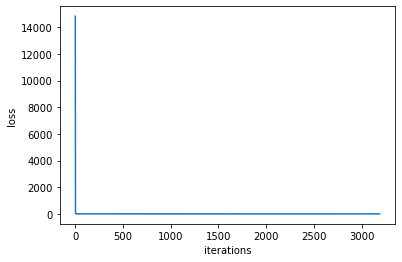

In [56]:
#loss vs. iterations
plt.plot(loss_multi) # alpha is important here ---> make it small as possible
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

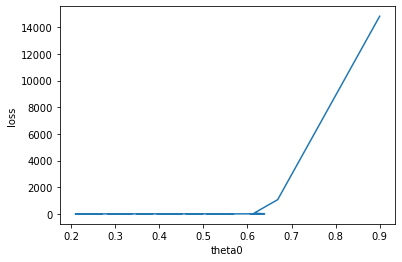

In [61]:
plt.plot(thetas_multi[1:,0],loss_multi)
plt.xlabel("theta0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

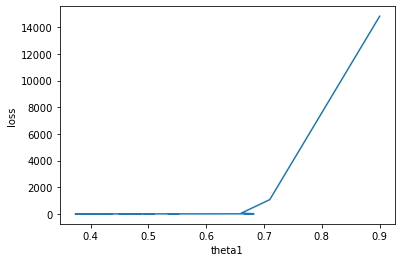

In [62]:
plt.plot(thetas_multi[1:,1],loss_multi)
plt.xlabel("theta1")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

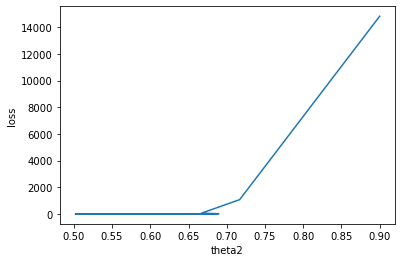

In [63]:
plt.plot(thetas_multi[1:,2],loss_multi)
plt.xlabel("theta2")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

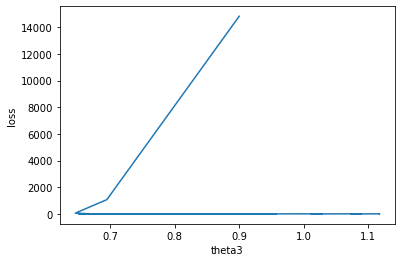

In [64]:
plt.plot(thetas_multi[1:,3],loss_multi)
plt.xlabel("theta3")
plt.ylabel("loss")